In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kstest
import scipy.stats as stats
from scipy import stats

# Равномерное распределение

In [8]:
sample_size = 50
samples_count = 500
uniform_samples = np.random.uniform(0, 10, (samples_count, sample_size ))
row_index = 1
one_uniform_sample = uniform_samples[row_index, :]
uniform_means = np.mean(uniform_samples, axis = 1)


Строим гистограмму одной из выборок, строим гистограмму средних всех выборок

In [9]:
import matplotlib.pyplot as plt

def plot_histograms(one_sample, samples_means, bins1=10, bins2=30, 
                   figsize=(15, 6), color='skyblue', edgecolor='navy', 
                   linewidth=1.2, alpha=0.7):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Первая гистограмма
    ax1.hist(one_sample, bins=bins1, alpha=alpha, color=color, 
             edgecolor=edgecolor, linewidth=linewidth)
    ax1.set_title('Гистограмма значений из одной выборки')
    
    # Вторая гистограмма
    ax2.hist(samples_means, bins=bins2, alpha=alpha, color=color, 
             edgecolor=edgecolor, linewidth=linewidth)
    ax2.set_title('Гистограмма средних значений из многих выборок')
    
    plt.tight_layout()
    plt.show()
    
    return fig, (ax1, ax2)

# Пример использования:
# fig, (ax1, ax2) = plot_histograms(one_uniform_sample, uniform_means)



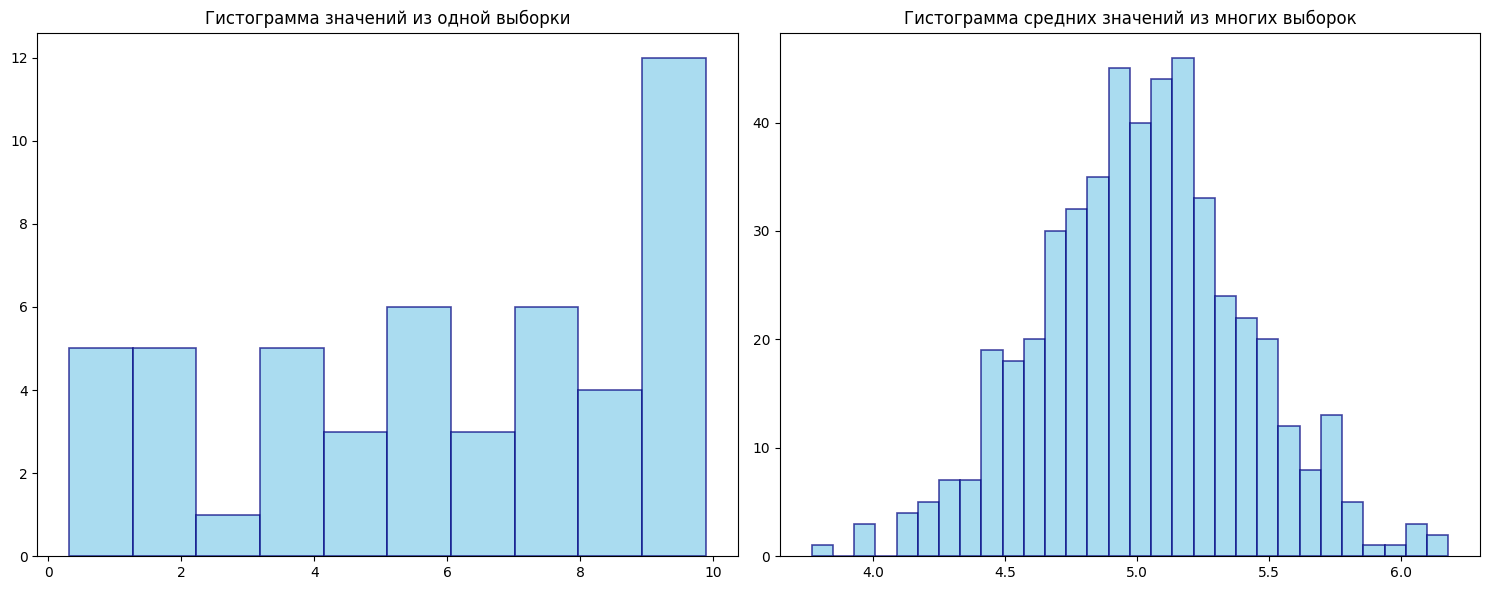

(<Figure size 1500x600 with 2 Axes>,
 (<Axes: title={'center': 'Гистограмма значений из одной выборки'}>,
  <Axes: title={'center': 'Гистограмма средних значений из многих выборок'}>))

In [7]:
plot_histograms(one_uniform_sample, uniform_means)

Пишем функцию сравнение эмпирических данных с теоретическим распределением

In [10]:
def plot_distribution_comparison(data, distribution=stats.norm, 
                                bins=30, color='lightgreen', 
                                title='Сравнение эмпирических данных с теоретическим распределением',
                                xlabel='Значения', ylabel='Плотность вероятности',
                                figsize=(12, 7), alpha=0.6, grid_alpha=0.3):
    
    # Создание графика
    plt.figure(figsize=figsize)

    # Построение гистограммы реальных данных
    plt.hist(data, bins=bins, density=True, alpha=alpha, color=color, 
             edgecolor='black', label='Эмпирические данные')

    # Подгонка распределения к данным
    params = distribution.fit(data)
    mu, std = params[0], params[1]  # Первые два параметра - обычно mean и std
    print(f"Подобранные параметры: μ = {mu:.3f}, σ = {std:.3f}")

    # Создание точек для теоретической кривой
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1000)

    # Вычисление значений теоретической кривой
    p = distribution.pdf(x, *params)

    # Построение теоретической кривой
    plt.plot(x, p, 'k', linewidth=3, label='Теоретическое распределение')

    # Добавление вертикальной линии на среднем
    plt.axvline(mu, color='red', linestyle='--', alpha=0.8, 
                label=f'Среднее (μ) = {mu:.3f}')

    # Настройка графика
    plt.title(title, fontsize=12)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(alpha=grid_alpha)
    plt.show()
    
    return mu, std



Подобранные параметры: μ = 4.990, σ = 0.388


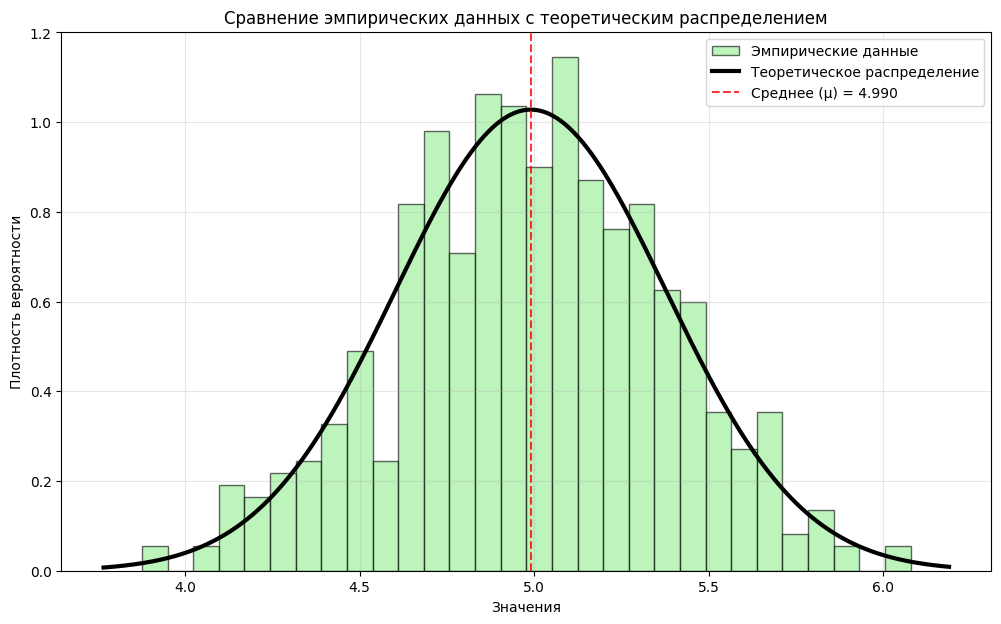

(4.989914438275424, 0.38808509459089563)

In [41]:
plot_distribution_comparison(uniform_means)

Строим график квантилей (Q-Q plot)

In [21]:
def build_probplots(sample, samples_means):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,6))
    stats.probplot(sample, dist='norm', plot=ax1)
    ax1.set_title('График квантилей одной выборки')
    stats.probplot(samples_means, dist='norm', plot=ax2)
    ax2.set_title('График квантилей средних многих выборок')
    plt.show()
    return fig, (ax1, ax2)

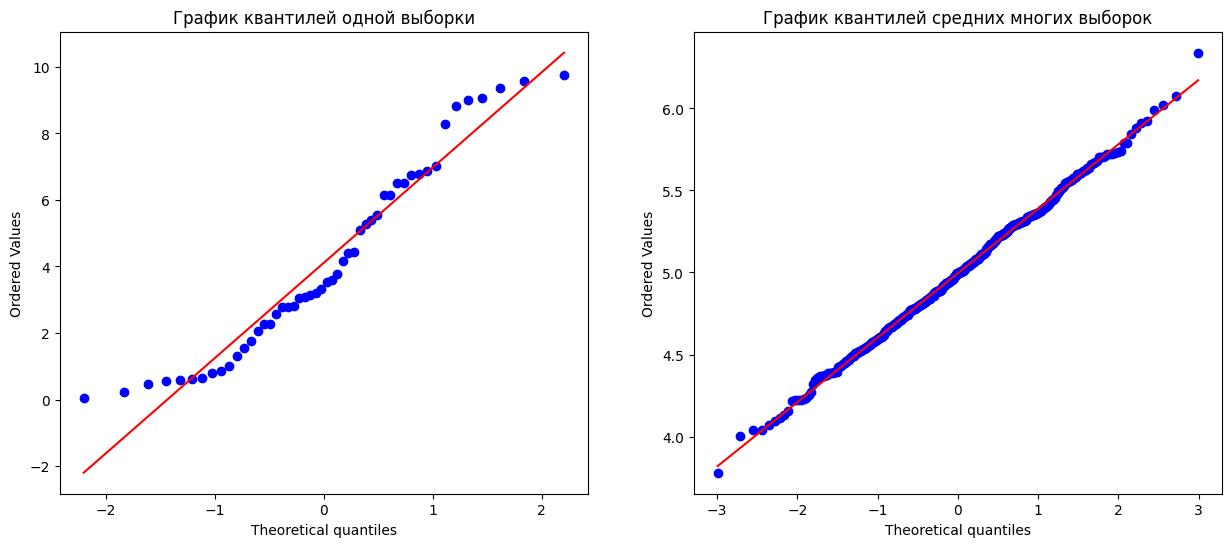

(<Figure size 1500x600 with 2 Axes>,
 (<Axes: title={'center': 'График квантилей одной выборки'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>,
  <Axes: title={'center': 'График квантилей средних многих выборок'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>))

In [22]:
build_probplots(one_uniform_sample, uniform_means)

Shapiro-Wilk Test (Recommended for small to medium samples)

In [14]:
stat, p = shapiro(uniform_means)
print(f'Shapiro-Wilk Test: statistic={stat:.3f}, p-value={p:.3f}')
if p > 0.05:
    print('Data looks normal (fail to reject H0)')
else:
    print('Data does not look normal (reject H0)')

Shapiro-Wilk Test: statistic=0.999, p-value=0.965
Data looks normal (fail to reject H0)


Kolmogorov-Smirnov Test

In [15]:
statistic, p_value = kstest(uniform_means, 'norm', args=(np.mean(uniform_means), np.std(uniform_means)))
print(f'K-S Test: statistic={stat:.3f}, p-value={p:.3f}')

if p > 0.05:
    print('Data looks normal')
else:
    print('Data does not look normal')

K-S Test: statistic=0.999, p-value=0.965
Data looks normal


# Биноминальное распределение

In [11]:
sample_size = 500
samples_count = 1000
n_trials = 10
prob_of_success = 0.25
binomial_data = np.random.binomial(n_trials, prob_of_success, size = (samples_count, sample_size))
binomial_means = np.mean(binomial_data, axis=1)
row_index = 1
binomial_sample = binomial_data[row_index, :]

Строим гистограмму одной из выборок, строим гистограмму средних всех выборок

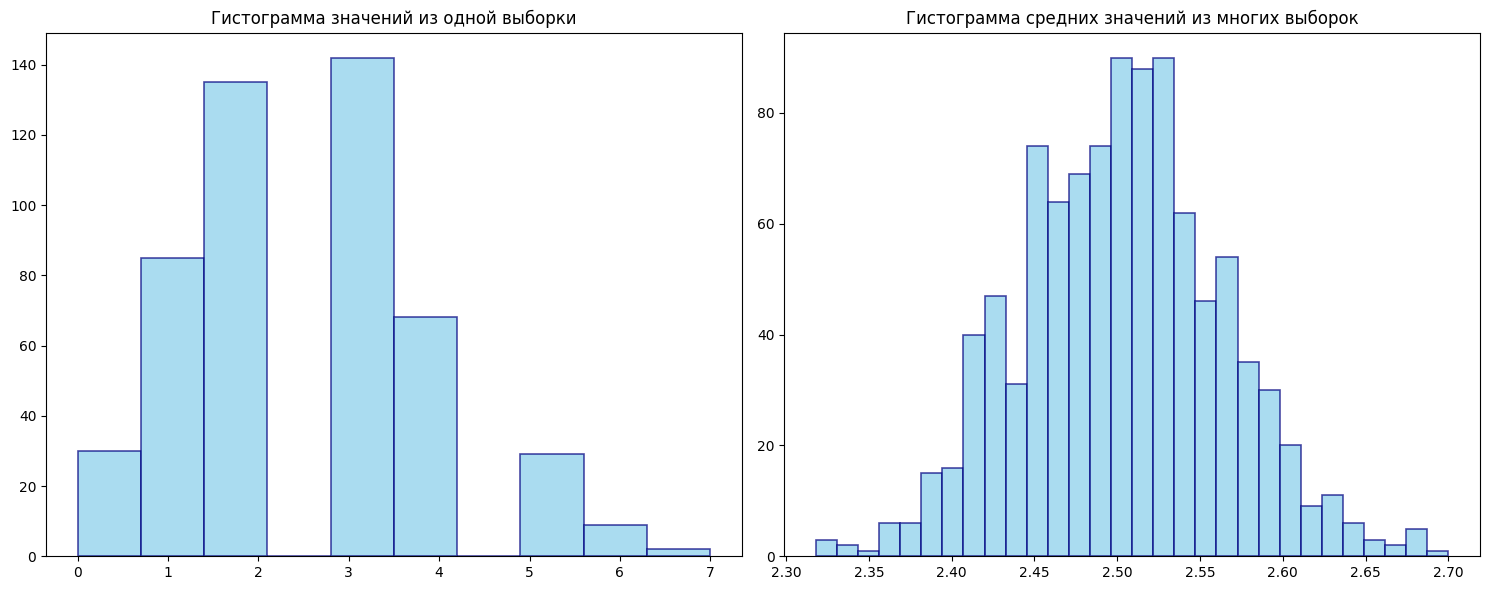

(<Figure size 1500x600 with 2 Axes>,
 (<Axes: title={'center': 'Гистограмма значений из одной выборки'}>,
  <Axes: title={'center': 'Гистограмма средних значений из многих выборок'}>))

In [16]:
plot_histograms(binomial_sample, binomial_means)

Наносим кривую нормального распределения на получившуюся гистограмму средних значений 1000 выборок из биномиального распределения

Подобранные параметры: μ = 2.498, σ = 0.062


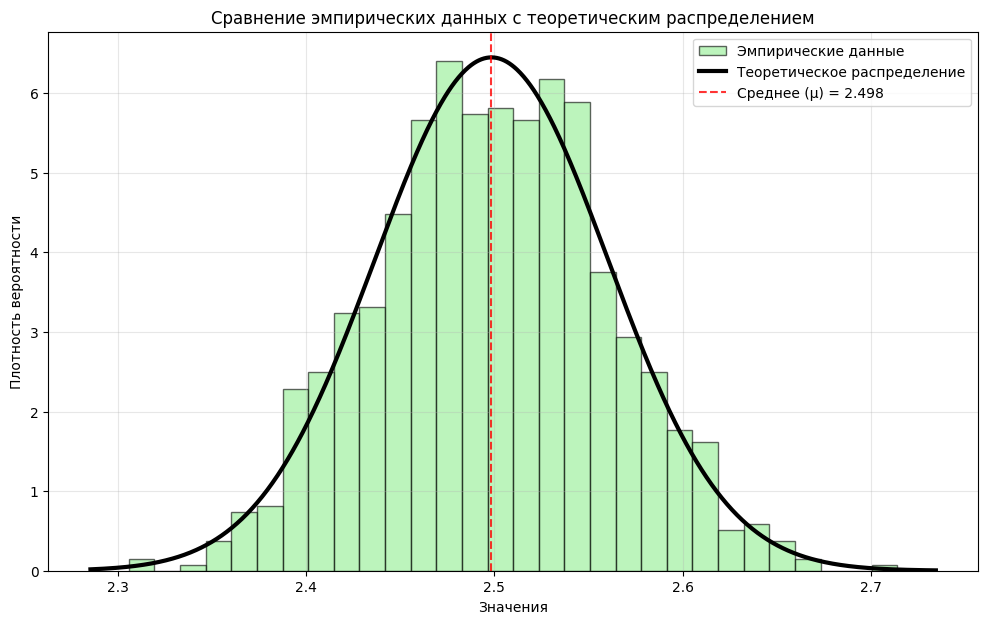

(2.4984740000000003, 0.061864071350017015)

In [31]:
plot_distribution_comparison(binomial_means)

Строим график квантилей (Q-Q plot)

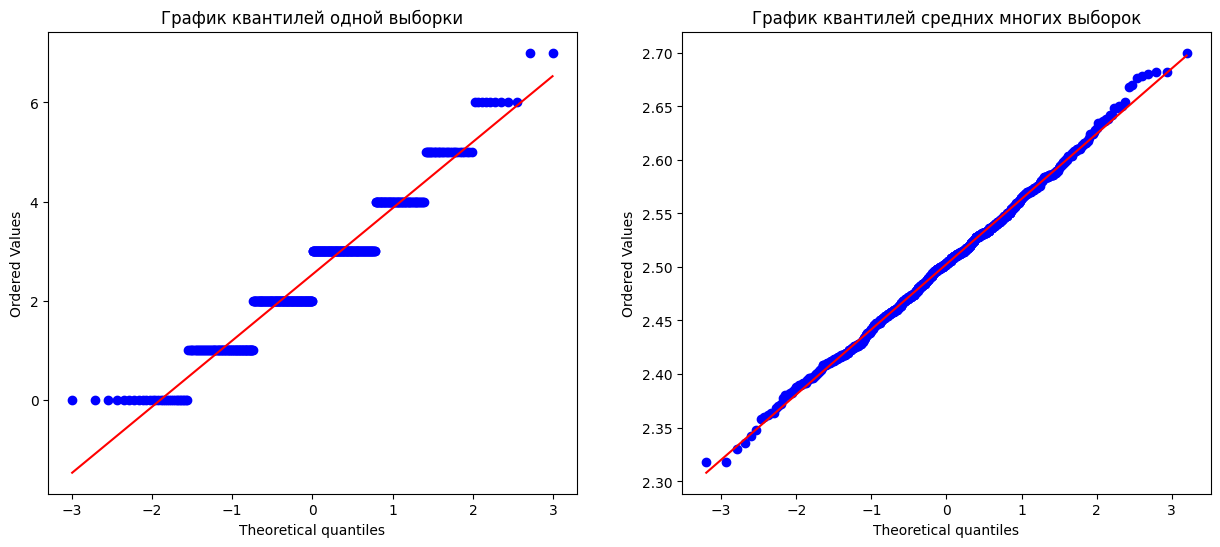

(<Figure size 1500x600 with 2 Axes>,
 (<Axes: title={'center': 'График квантилей одной выборки'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>,
  <Axes: title={'center': 'График квантилей средних многих выборок'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>))

In [23]:
build_probplots(binomial_sample, binomial_means)

In [33]:
stat, p = shapiro(binomial_means)
print(f'Shapiro-Wilk Test: statistic={stat:.3f}, p-value={p:.3f}')
if p > 0.05:
    print('Data looks normal (fail to reject H0)')
else:
    print('Data does not look normal (reject H0)')

Shapiro-Wilk Test: statistic=0.998, p-value=0.509
Data looks normal (fail to reject H0)


In [34]:
statistic, p_value = kstest(uniform_means, 'norm', args=(np.mean(uniform_means), np.std(uniform_means)))
print(f'K-S Test: statistic={stat:.3f}, p-value={p:.3f}')

if p > 0.05:
    print('Data looks normal')
else:
    print('Data does not look normal')

K-S Test: statistic=0.998, p-value=0.509
Data looks normal


# Распределение Пуассона

In [17]:
sample_size = 50
samples_count = 10_000
lmbd = 10
poisson_data = np.random.poisson(lmbd, size = (samples_count, sample_size))
poisson_data
poisson_sample_means = np.mean(poisson_data, axis=1)
row_index = 1
poisson_sample = poisson_data[row_index, : ]

Гистограмма значений одной выборки из распределения Пуассона

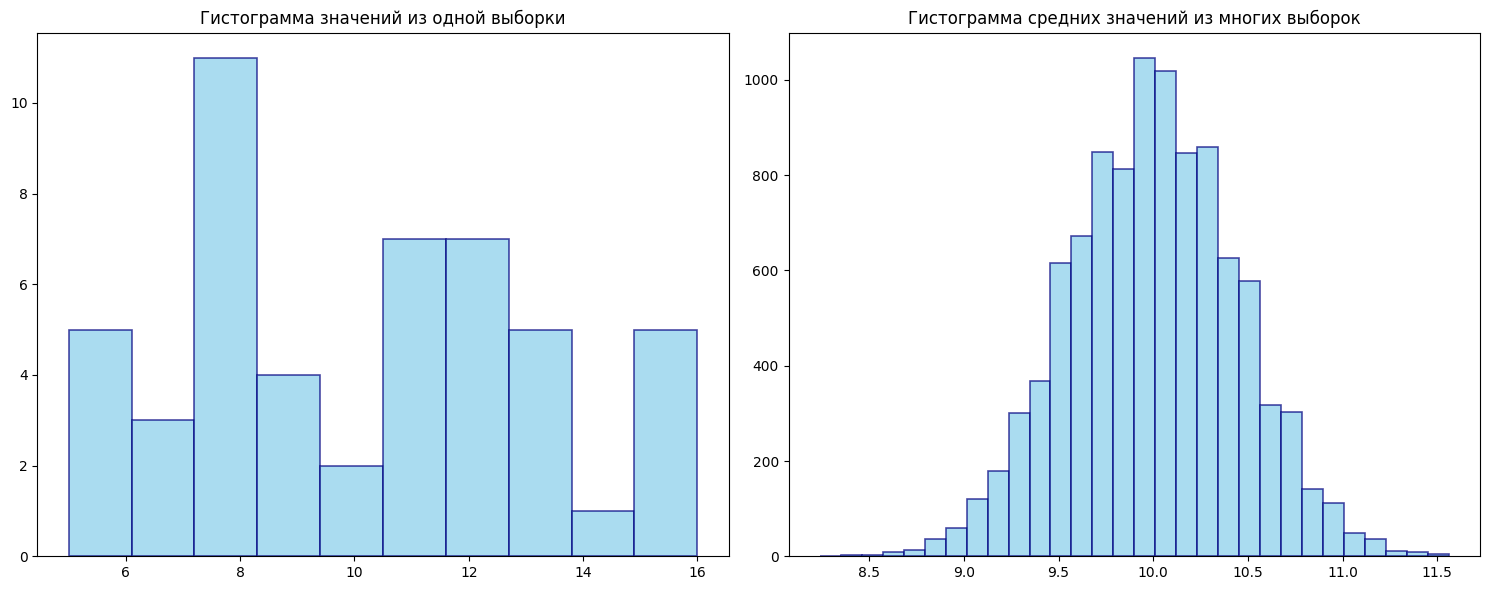

(<Figure size 1500x600 with 2 Axes>,
 (<Axes: title={'center': 'Гистограмма значений из одной выборки'}>,
  <Axes: title={'center': 'Гистограмма средних значений из многих выборок'}>))

In [18]:
plot_histograms(poisson_sample, poisson_sample_means)

Наносим кривую нормального распределения на получившуюся гистограмму средних значений 10_000 выборок из распределения Пуассона

Подобранные параметры: μ = 9.998, σ = 0.449


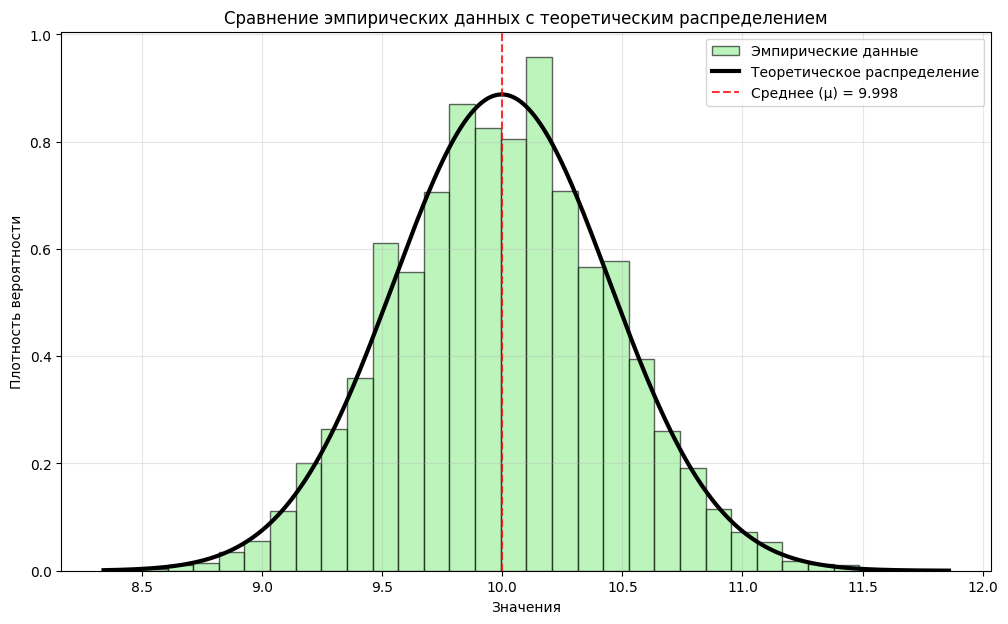

(9.997872000000001, 0.44919976804980655)

In [42]:
plot_distribution_comparison(poisson_sample_means)

# Строим график квантилей

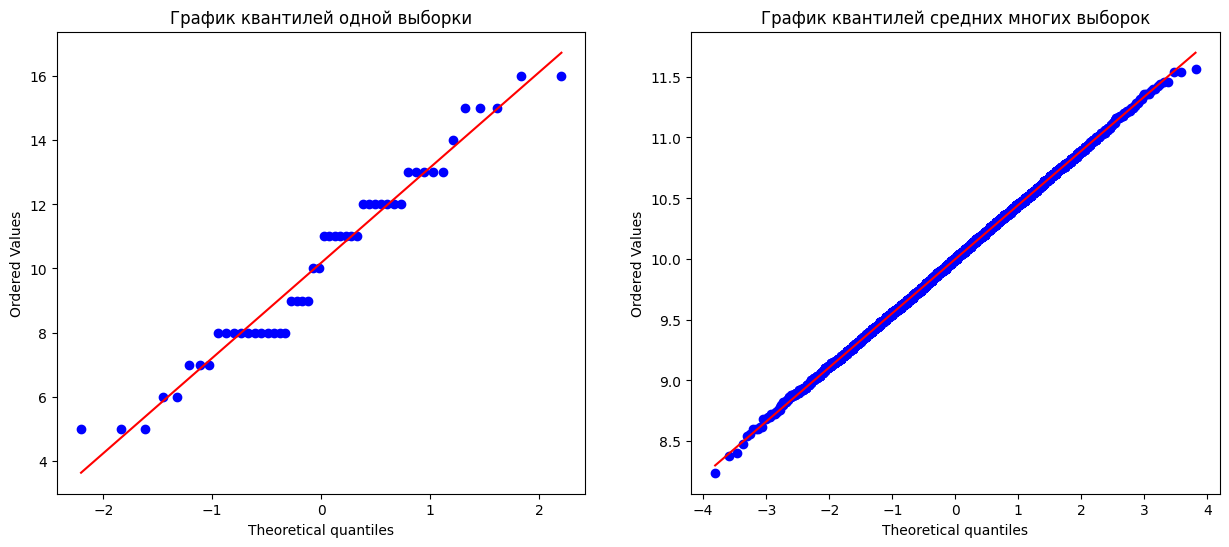

(<Figure size 1500x600 with 2 Axes>,
 (<Axes: title={'center': 'График квантилей одной выборки'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>,
  <Axes: title={'center': 'График квантилей средних многих выборок'}, xlabel='Theoretical quantiles', ylabel='Ordered Values'>))

In [24]:
build_probplots(poisson_sample, poisson_sample_means)

# Shapiro-Wilk Test (Recommended for small to medium samples)

In [44]:
stat, p = shapiro(poisson_sample_means)
print(f'Shapiro-Wilk Test: statistic={stat:.3f}, p-value={p:.3f}')
if p > 0.05:
    print('Data looks normal (fail to reject H0)')
else:
    print('Data does not look normal (reject H0)')

Shapiro-Wilk Test: statistic=0.999, p-value=0.002
Data does not look normal (reject H0)


/home/alex/miniconda3/envs/py38/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Kolmogorov-Smirnov Test

In [45]:
statistic, p_value = kstest(uniform_means, 'norm', args=(np.mean(poisson_sample_means), np.std(uniform_means)))
print(f'K-S Test: statistic={stat:.3f}, p-value={p:.3f}')

if p > 0.05:
    print('Data looks normal')
else:
    print('Data does not look normal')

K-S Test: statistic=0.999, p-value=0.002
Data does not look normal
